In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [2]:
df=pd.read_csv("MY2021 Fuel Consumption Ratings.csv", sep=';')

In [3]:
df

,Model,Make,Model.1,VehicleClass,EngineSize,Cylinders,Transmission,Fuel,FuelConsumption,CO2 Emissions,CO2,Smog
0,2021,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,199.0,6.0,3.0
1,2021,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,256.0,4.0,3.0
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS10,Z,11.0,232.0,5.0,6.0
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4.0,AS10,Z,11.3,242.0,5.0,6.0
4,2021,Acura,TLX SH-AWD,Compact,2.0,4.0,AS10,Z,11.2,230.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
988,NaN,N = natural gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,Fuel consumption,City and highway fuel consumption ratings are ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,CO2 emissions,the tailpipe emissions of carbon dioxide (in g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,CO2 rating,the tailpipe emissions of carbon dioxide rated...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [4]:
df1=df[['EngineSize', 'Cylinders', 'FuelConsumption', 'CO2 Emissions']]
df1

,EngineSize,Cylinders,FuelConsumption,CO2 Emissions
0,2.4,4.0,9.9,199.0
1,3.5,6.0,11.1,256.0
2,2.0,4.0,11.0,232.0
3,2.0,4.0,11.3,242.0
4,2.0,4.0,11.2,230.0
...,...,...,...,...
988,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN
991,NaN,NaN,NaN,NaN


In [5]:
df1=df1.fillna(df1.mean())
df1

,EngineSize,Cylinders,FuelConsumption,CO2 Emissions
0,2.400000,4.000000,9.900000,199.000000
1,3.500000,6.000000,11.100000,256.000000
2,2.000000,4.000000,11.000000,232.000000
3,2.000000,4.000000,11.300000,242.000000
4,2.000000,4.000000,11.200000,230.000000
...,...,...,...,...
988,3.217835,5.731959,12.544845,259.634021
989,3.217835,5.731959,12.544845,259.634021
990,3.217835,5.731959,12.544845,259.634021
991,3.217835,5.731959,12.544845,259.634021


,EngineSize,Cylinders,FuelConsumption,CO2 Emissions
0,2.400000,4.000000,9.900000,199.000000
1,3.500000,6.000000,11.100000,256.000000
2,2.000000,4.000000,11.000000,232.000000
3,2.000000,4.000000,11.300000,242.000000
4,2.000000,4.000000,11.200000,230.000000
...,...,...,...,...
988,3.217835,5.731959,12.544845,259.634021
989,3.217835,5.731959,12.544845,259.634021
990,3.217835,5.731959,12.544845,259.634021
991,3.217835,5.731959,12.544845,259.634021


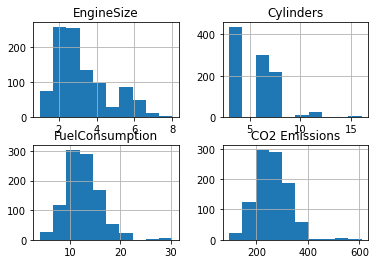

In [6]:
plt=df1
plt.hist()
plt

Text(0, 0.5, 'CO2 Emissions')

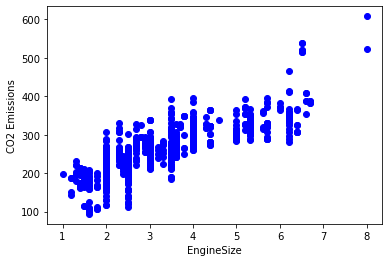

In [9]:
plt.scatter(df1.EngineSize, df['CO2 Emissions'], color='blue')
plt.xlabel('EngineSize')
plt.ylabel('CO2 Emissions')

# REGRESI SEDERHANA

In [10]:
msk = np.random.rand(len(df1))<0.8
train= df1[msk]
test = df1[~msk]

In [11]:
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['EngineSize']])
train_y = np.asanyarray(train[['CO2 Emissions']])
reg.fit(train_x, train_y)

print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficients:  [[37.85263224]]
Intercept:  [135.77360322]


Text(0, 0.5, 'CO2 Emissions')

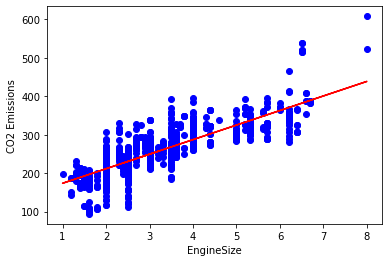

In [12]:
plt.scatter(df1.EngineSize, df['CO2 Emissions'], color='blue')
plt.plot(train_x, reg.coef_[0][0] * train_x + reg.intercept_[0], color='red')
plt.xlabel('EngineSize')
plt.ylabel('CO2 Emissions')

# REGRESSION BERGANDA

In [13]:
df1.describe()

,EngineSize,Cylinders,FuelConsumption,CO2 Emissions
count,993.000000,993.000000,993.000000,993.000000
mean,3.217835,5.731959,12.544845,259.634021
std,1.372652,1.963967,3.480200,64.282854
min,1.000000,3.000000,4.000000,94.000000
25%,2.000000,4.000000,10.200000,214.000000
50%,3.000000,6.000000,12.200000,258.000000
75%,4.000000,8.000000,14.700000,302.000000
max,8.000000,16.000000,30.300000,608.000000


Text(0, 0.5, 'CO2 Emissions')

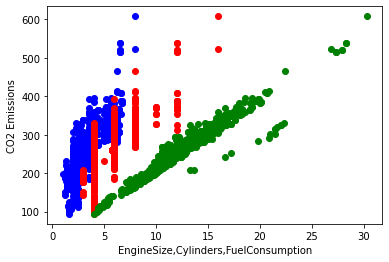

In [14]:
plt.scatter(df1.EngineSize, df1['CO2 Emissions'], color='blue')
plt.scatter(df1.Cylinders, df1['CO2 Emissions'], color='red')
plt.scatter(df1.FuelConsumption, df1['CO2 Emissions'], color='green')
plt.xlabel('EngineSize,Cylinders,FuelConsumption')
plt.ylabel('CO2 Emissions')

In [15]:
msk1 = np.random.rand(len(df1))<0.8
train1= df1[msk1]
test1 = df1[~msk1]

In [16]:
regr = linear_model.LinearRegression()
train1_x = np.asanyarray(train1[['EngineSize','Cylinders','FuelConsumption']])
train1_y = np.asanyarray(train1[['CO2 Emissions']])
regr.fit(train1_x, train1_y)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[ 1.75468208  0.75074732 16.93643443]]
Intercept:  [37.62210385]


In [17]:
test_x = np.asanyarray(test[['EngineSize','Cylinders','FuelConsumption']])
test_y = np.asanyarray(test[['CO2 Emissions']])

In [20]:
test_x = regr.predict(test_x)

print("MAE : %.2f" % mean_absolute_error(test_x,test_y))
print("MSE : %.2f" % mean_squared_error(test_x,test_y))
print("RMSE : %.2f" % math.sqrt(mean_squared_error(test_x,test_y)))
print("R2-Score : %.2f" % r2_score(test_x,test_y))

MAE : 10.49
MSE : 359.78
RMSE : 18.97
R2-Score : 0.92
